# PART A

## Data Loading: 

In [1]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
import pandas as pd
from IPython.display import display

# fetch dataset
spambase = fetch_ucirepo(id=94)

# loading as dataframe
x = spambase.data.features
y = spambase.data.targets

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Training the SVM:

In [2]:
# from sklearn.svm import SVC
from sklearn.svm import LinearSVC

# svm_model = SVC(kernel='linear')
svm_model = LinearSVC(dual=False)
svm_model.fit(X_train, y_train.values.ravel())

LinearSVC(dual=False)

## Prediction and Evaluation:

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = svm_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9207383279044516
Precision: 0.9318801089918256
Recall: 0.8769230769230769
F1 Score: 0.9035667107001321


## Regularisation:

In [4]:
import matplotlib.pyplot as plt

C_values = [0.001, 0.1, 1, 10, 100]
accuracy_values = []

for c in C_values:
    # Create and train the SVM classifier with the specified C value
#     svm_classifier = SVC(kernel='linear', C=c)
    svm_classifier = LinearSVC(dual=False,C=c)
    svm_classifier.fit(X_train, y_train.values.ravel())

    # Generate predictions on the test set
    y_pred = svm_classifier.predict(X_test)

    # Calculate accuracy and store it in the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Tabularize the accuracy values for different C values
results = pd.DataFrame({'C Value': C_values, 'Accuracy': accuracy_values})
display(results)

,C Value,Accuracy
0,0.001,0.914224
1,0.100,0.921824
2,1.000,0.920738
3,10.000,0.917481
4,100.000,0.917481


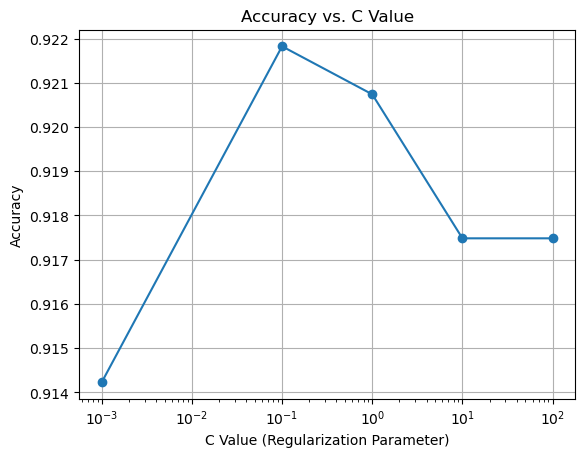

In [5]:
# Plot the accuracy values
plt.figure()
plt.plot(C_values, accuracy_values, marker='o')
plt.xscale('log')
plt.xlabel('C Value (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. C Value')
plt.grid()
plt.show()

# PART B

## Polynomial of degree 2

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

svm_model = SVC(kernel='poly', degree=2)

# Fit the SVM model
svm_model.fit(X_train, y_train.values.ravel())
    
# Make predictions on the test set
y_pred = svm_model.predict(X_test)
    
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1.0)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6492942453854506
Precision: 0.8764044943820225
Recall: 0.2
F1 Score: 0.325678496868476


## Polynomial of degree 3

In [7]:
svm_model = SVC(kernel='poly', degree=3)

# Fit the SVM model
svm_model.fit(X_train, y_train.values.ravel())
    
# Make predictions on the test set
y_pred = svm_model.predict(X_test)
    
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1.0)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6254071661237784
Precision: 0.8688524590163934
Recall: 0.1358974358974359
F1 Score: 0.2350332594235033


## Sigmoid

In [8]:
svm_model = SVC(kernel='sigmoid')

# Fit the SVM model
svm_model.fit(X_train, y_train.values.ravel())
    
# Make predictions on the test set
y_pred = svm_model.predict(X_test)
    
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1.0)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6351791530944625
Precision: 0.5737704918032787
Recall: 0.5384615384615384
F1 Score: 0.5555555555555556


## Radial Basis Function (RBF)

In [9]:
svm_model = SVC(kernel='rbf')

# Fit the SVM model
svm_model.fit(X_train, y_train.values.ravel())
    
# Make predictions on the test set
y_pred = svm_model.predict(X_test)
    
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1.0)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6623235613463626
Precision: 0.6612244897959184
Recall: 0.4153846153846154
F1 Score: 0.510236220472441


# Part C

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Define the combinations of polynomial degree and 'C' values to experiment with
experiments = [
    {'degree': 1, 'C': 0.01},
    {'degree': 1, 'C': 100},
    {'degree': 3, 'C': 0.01},
    {'degree': 3, 'C': 100}
]

# Create empty lists to store results
results = {'Experiment': [], 'Train Accuracy': [], 'Test Accuracy': []}

# Loop through the experiments
for i, exp in enumerate(experiments):
    degree = exp['degree']
    C = exp['C']
    
    # Create and train the SVM model
    svm_model = SVC(kernel='poly', degree=degree, C=C)
    svm_model.fit(X_train, y_train.values.ravel())
    
    # Make predictions on the training and test sets
    y_train_pred = svm_model.predict(X_train)
    y_test_pred = svm_model.predict(X_test)
    
    # Calculate accuracy on the training and test sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store results in the dictionary
    results['Experiment'].append(i + 1)
    results['Train Accuracy'].append(train_accuracy)
    results['Test Accuracy'].append(test_accuracy)

# Convert results to a DataFrame for tabulation
results_df = pd.DataFrame(results)

# Display the tabulated results
display(results_df)


,Experiment,Train Accuracy,Test Accuracy
0,1,0.663587,0.621064
1,2,0.784511,0.760043
2,3,0.651359,0.611292
3,4,0.699728,0.660152


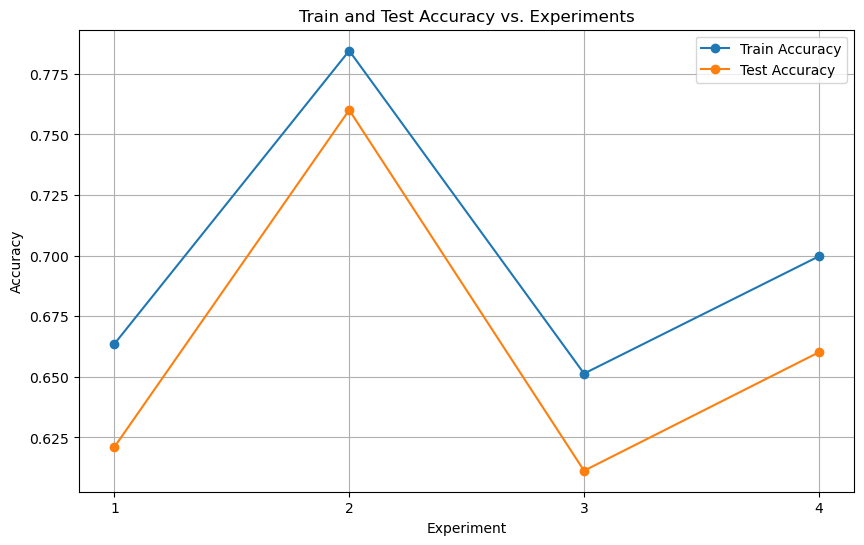

In [11]:
# Plot the train and test accuracy for each experiment
plt.figure(figsize=(10, 6))
plt.plot(results_df['Experiment'], results_df['Train Accuracy'], marker='o', label='Train Accuracy')
plt.plot(results_df['Experiment'], results_df['Test Accuracy'], marker='o', label='Test Accuracy')
plt.xlabel('Experiment')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs. Experiments')
plt.xticks(results_df['Experiment'])
plt.legend()
plt.grid()
plt.show()